In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_yds_rec_salary_19-20')

In [3]:
tes.dtypes

NAME             object
YDS/REC         float64
YDS/REC_rank    float64
salary            int64
dtype: object

In [4]:
tes.head()

,NAME,YDS/REC,YDS/REC_rank,salary
0,Jared Cook,16.4,1.5,7500000
1,Noah Fant,14.1,4.0,3147680
2,Dawson Knox,13.9,5.0,880400
3,Maxx Williams,13.5,6.5,3500000
4,Mark Andrews,13.0,9.0,863290


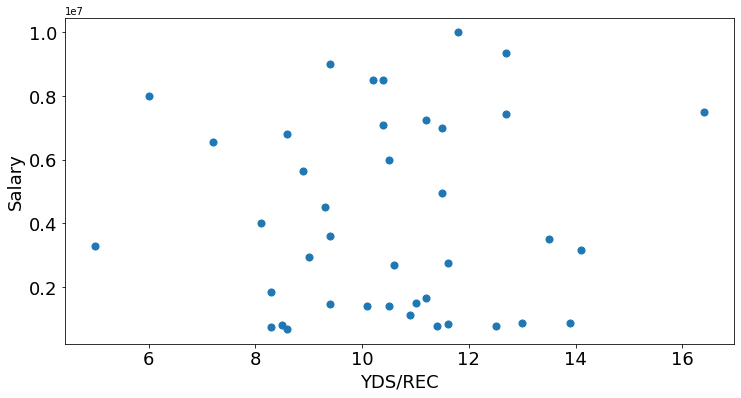

In [5]:
ax = tes.plot(kind="scatter", x = 'YDS/REC',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/REC', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['YDS/REC', 'salary']])

In [7]:
X.mean(axis = 0)

array([-2.22044605e-16,  0.00000000e+00])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 0.28921451,  1.20023176],
       [-0.54711805, -0.72780181],
       [ 0.80007775, -0.85798121],
       [ 2.68285598,  1.12000535],
       [-1.44112872,  0.52017641]])

In [11]:
km.predict(X)

array([3, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 4, 4], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,YDS/REC,YDS/REC_rank,salary,clusters
0,Jared Cook,16.4,1.5,7500000,3
1,Noah Fant,14.1,4.0,3147680,2
2,Dawson Knox,13.9,5.0,880400,2
3,Maxx Williams,13.5,6.5,3500000,2
4,Mark Andrews,13.0,9.0,863290,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.11181818e+01, 7.73851873e+06],
       [9.27272727e+00, 2.00634027e+06],
       [1.22454545e+01, 1.61930782e+06],
       [1.64000000e+01, 7.50000000e+06],
       [7.30000000e+00, 5.71666667e+06]])

In [14]:
tes.groupby('clusters')[['YDS/REC', 'salary']].mean()

,YDS/REC,salary
clusters,,
0,11.118182,7.738519e+06
1,9.272727,2.006340e+06
2,12.245455,1.619308e+06
3,16.400000,7.500000e+06
4,7.300000,5.716667e+06


In [15]:
centroids = tes.groupby('clusters')[['YDS/REC', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

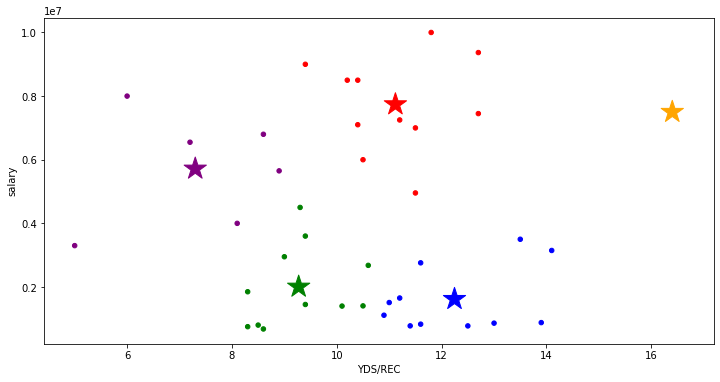

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'YDS/REC', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/REC', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

16.438856624761478

In [18]:
silhouette_score(X, km.labels_)

0.37926931220618415